In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# För skalning och kategoriska variabler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

In [4]:
df = load_iris(as_frame=True).frame

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

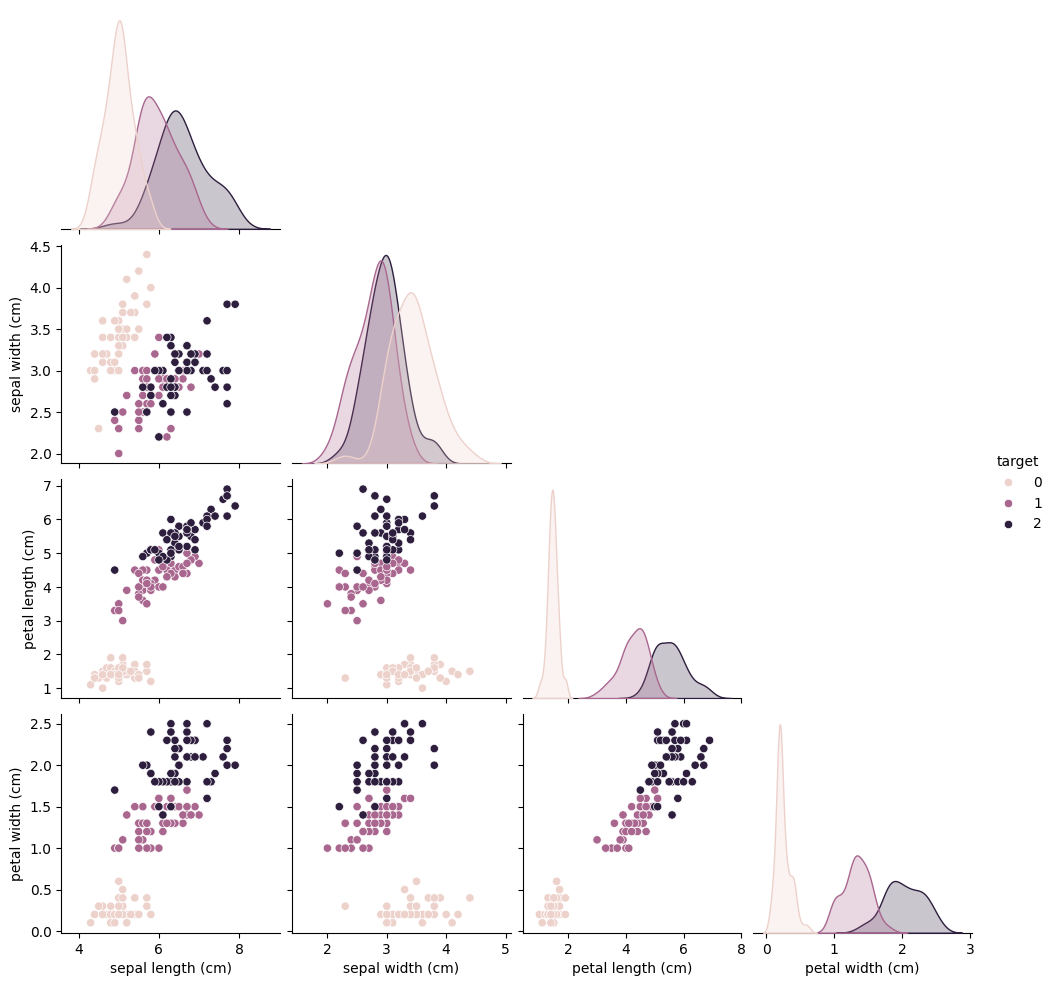

In [7]:
sns.pairplot(df, hue = "target", corner = True)
plt.show

<Axes: >

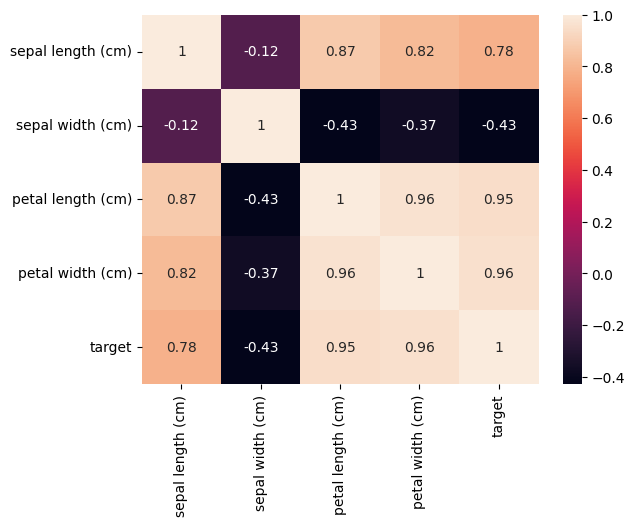

In [15]:
fig, ax = plt.subplots()

sns.heatmap(df.corr(), annot=True, ax=ax)

<Axes: >

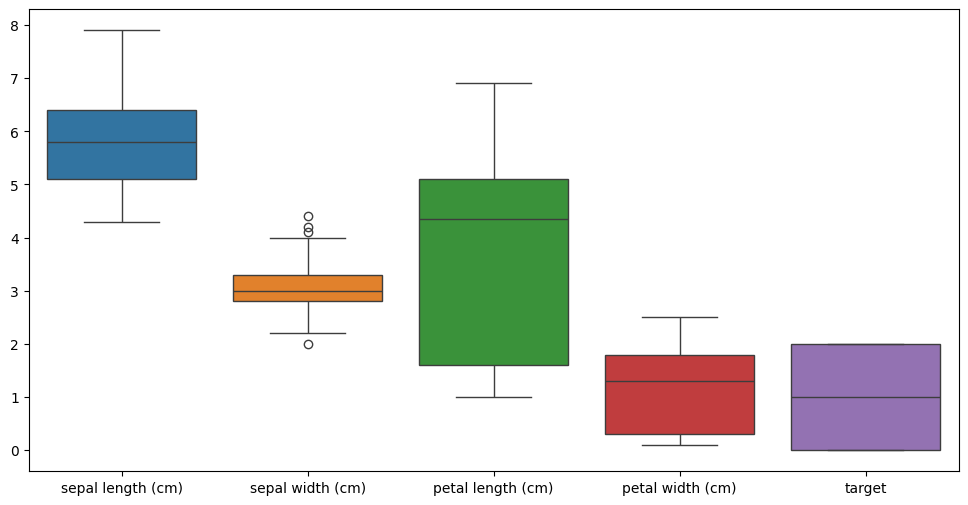

In [36]:
fig, ax = plt.subplots(1, figsize = (12, 6), dpi = 100)
sns.boxplot(df)

##### ta bort outliers i datan!

In [18]:
q1 = df["sepal width (cm)"].quantile(.25)
q1

np.float64(2.8)

In [19]:
q3 = df["sepal width (cm)"].quantile(.75)
q3

np.float64(3.3)

In [20]:
iqr =  q3-q1
iqr

np.float64(0.5)

In [21]:
lower_bound = q1-1.5*iqr
higher_bound = q3+1.5*iqr

lower_bound, higher_bound

(np.float64(2.05), np.float64(4.05))

In [22]:
(df["sepal width (cm)"] > lower_bound).sum()
(df["sepal width (cm)"] < higher_bound).sum()

np.int64(147)

In [25]:
df_no_outliers = df[
    (df["sepal width (cm)"] > lower_bound)
    & (df["sepal width (cm)"] < higher_bound)
]

df_no_outliers.shape

(146, 5)

In [27]:
X, y = df_no_outliers.drop("target", axis = 1), df_no_outliers["target"]

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((97, 4), (49, 4))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(np.float64(2.998746726307124e-16),
 np.float64(0.9999999999999998),
 np.float64(-0.026200181679167715),
 np.float64(0.9999349444958894))

Klassificera med logistic regression

Klassificera de 10 första värderna av X-test och jämfört manuell med 'labels'

In [32]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(scaled_X_train, y_train)

model.predict(scaled_X_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])

In [33]:
y_test.iloc[:10].values

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0])

Utvärdera med confussion matrix och classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        11
           2       0.95      1.00      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



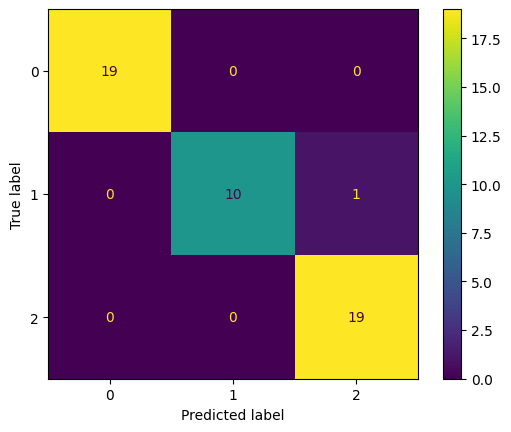

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()